In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../data/weight-height.csv')

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


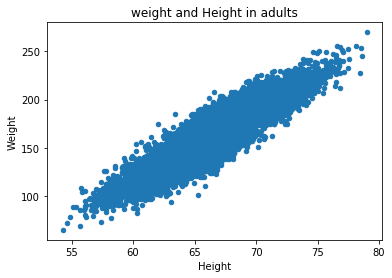

In [9]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='weight and Height in adults')

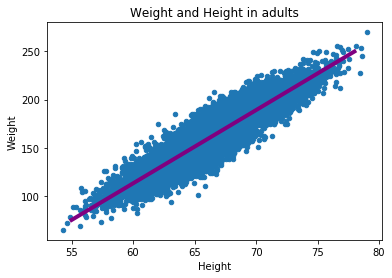

In [10]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults')

plt.plot([55,78], [75,250], color='purple', linewidth=4)

In [11]:
def line(x, w=0, b=0):
    return x * w + b



In [12]:
x = np.linspace(55, 80, 100)
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [13]:
yhat = line(x, w=0, b=0)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

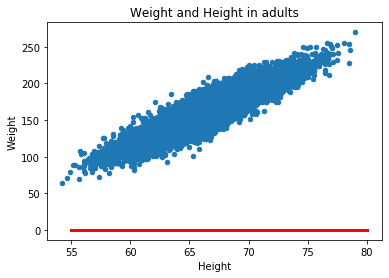

In [14]:

df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

# Cost Function

In [15]:
def mean_squared_error(y_ture, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [16]:
x = df[['Height']].values #return array
y_true = df['Weight'].values
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [17]:
y_pred = line(x)
y_pred


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
mean_squared_error(y_true, y_pred)

27093.83757456164

Text(0.5, 0, 'b')

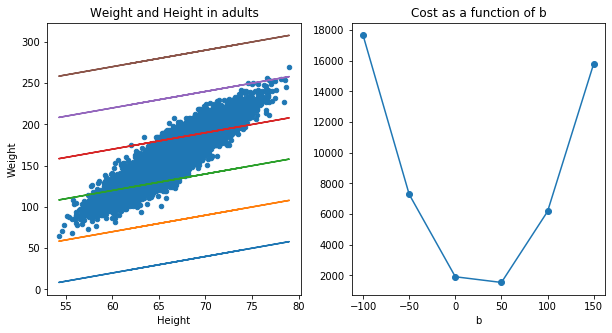

In [23]:
plt.figure(figsize=(10,5))


ax1 = plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults', ax=ax1)

bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []
for b in bbs:
    y_pred = line(x, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)
    
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')


# Linear Regression with Keras

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [25]:
model = Sequential()
model.add(Dense(1, input_shape=(1,))) #dense layer like line func() above

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [28]:
model.fit(x, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 74us/step - loss: 718.5137: 0s - loss: 721.663
Epoch 2/40
10000/10000 [==============================] - 0s 26us/step - loss: 544.5531
Epoch 3/40
10000/10000 [==============================] - 0s 25us/step - loss: 516.3748
Epoch 4/40
10000/10000 [==============================] - 0s 25us/step - loss: 437.1790
Epoch 5/40
10000/10000 [==============================] - 0s 24us/step - loss: 412.9021
Epoch 6/40
10000/10000 [==============================] - 0s 24us/step - loss: 354.4140
Epoch 7/40
10000/10000 [==============================] - 0s 24us/step - loss: 322.6133
Epoch 8/40
10000/10000 [==============================] - 0s 24us/step - loss: 290.1531
Epoch 9/40
10000/10000 [==============================] - 0s 23us/step - loss: 284.3162
Epoch 10/40
10000/10000 [==============================] - 0s 24us/step - loss: 249.4098
Epoch 11/40
10000/10000 [==============================] - 0s 25us/step - loss: 231.8160
Epoch 12/4

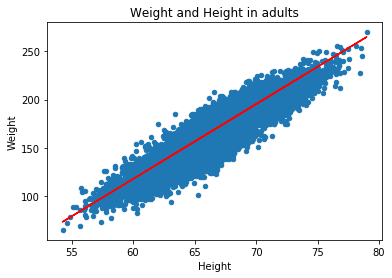

In [29]:
y_pred = model.predict(x)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot(x, y_pred, color='red')

In [30]:
W, B = model.get_weights()

In [32]:
W

array([[7.7675905]], dtype=float32)

In [33]:
B

array([-348.4701], dtype=float32)